#**Day 2 with Python** 
Polynomial Regression

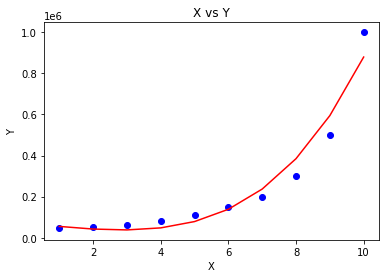

In [47]:
import pandas
import matplotlib.pyplot as plt
import numpy as np

data = pandas.read_csv('/content/drive/MyDrive/Colab Notebooks/MachineLearning/Day2/Position_Salaries.csv')

def predict(X ) :
  # transform X for polynomial  h( x ) = w0 * x^0 + w1 * x^1 + w2 * x^2 + ........+ wn * x^n
  X_transform = transform( X )
  X_normalize = normalize( X_transform )
  return np.dot( X_transform, W )

def transform(X) :
  X_transform = np.ones( ( n, 1 ) )
  j = 0
  for j in range(degree + 1 ) :   
    if j != 0 :      
      x_pow = np.power( X, j )
      X_transform = np.append( X_transform, x_pow.values.reshape( -1, 1 ), axis = 1 )
  return X_transform

def normalize( X ) :
  X[:, 1:] = ( X[:, 1:] - np.mean( X[:, 1:], axis = 0 ) ) / np.std( X[:, 1:], axis = 0 )
  return X

def fit( X, Y ) :
  n = len(X)
  # weight initialization
  W = np.zeros( degree + 1 )
  # transform X for polynomial  h( x ) = w0 * x^0 + w1 * x^1 + w2 * x^2 + ........+ wn * x^n
  X_transform = transform( X )
  # normalize X_transform
  X_normalize = normalize( X_transform )
  # gradient descent learning
  for i in range( iterations ) :
    h = np.dot( X_transform, W )
    error = h - Y
    # update weights
    W = W - learningrate * ( 1 / n ) * np.dot( X_normalize.T, error )
  return W

X = data['Level']
n = len(X)
Y = data['Salary']

degree = 4
learningrate = 0.01
iterations = 1000
W = fit(X,Y)
Y_pred = predict( X )

plt.scatter( X, Y, color = 'blue' )
plt.plot( X, Y_pred, color = 'red' )
plt.title( 'X vs Y' )
plt.xlabel( 'X' )
plt.ylabel( 'Y' )
plt.show()